# <center> Exercise 06

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

### Read data

In [2]:
data = pd.read_csv('mibilegame.csv')

### Overview of the data

In [3]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
print(f"The Shape of Dataset:{ data.shape}")

The Shape of Dataset:(90189, 5)


In [5]:
column_names = data.columns
column_names

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

In [6]:
data.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

### Check the features

#### Explanation for each feature in the mibilegame dataset:

1- userid: This column represents a unique identifier for each user in the dataset. It can be used to track individual user behavior and analyze user-level patterns.

2- version: This column represents the version of the mobile game that each user was assigned to. In an A/B test, for example, different groups of users might be randomly assigned to different versions of the game to test the effectiveness of different features or design elements.
- Gate_30: Do NOT seen any ads
- Gate_40: Seen ads

3- sum_gamerounds: This column represents the total number of game rounds played by each user during a certain period of time. It can be used to measure user engagement with the game and to identify users who are more or less active.

4- retention_1: This column represents whether a user returned to the game after 1 day of playing it for the first time. It is a binary variable that takes the value 1 if the user returned and 0 if they did not. It can be used to measure short-term user retention and to evaluate the effectiveness of different retention strategies.

5- retention_7: This column represents whether a user returned to the game after 7 days of playing it for the first time. It is also a binary variable that takes the value 1 if the user returned and 0 if they did not. It can be used to measure longer-term user retention and to see how many users continue to engage with the game over time.

In [7]:
# Check null values
data.isnull().any()

userid            False
version           False
sum_gamerounds    False
retention_1       False
retention_7       False
dtype: bool

In [8]:
# display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [9]:
# Display summary statistics of the dataset
data.describe(include='all')

,userid,version,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189,90189.000000,90189,90189
unique,NaN,2,NaN,2,2
top,NaN,gate_40,NaN,False,False
freq,NaN,45489,NaN,50036,73408
mean,4.998412e+06,NaN,51.872457,NaN,NaN
std,2.883286e+06,NaN,195.050858,NaN,NaN
min,1.160000e+02,NaN,0.000000,NaN,NaN
25%,2.512230e+06,NaN,5.000000,NaN,NaN
50%,4.995815e+06,NaN,16.000000,NaN,NaN
75%,7.496452e+06,NaN,51.000000,NaN,NaN


In [10]:
# Count two groups of test

seen_ornot_seen_ads = data["version"].value_counts()
seen_ornot_seen_ads

gate_40    45489
gate_30    44700
Name: version, dtype: int64

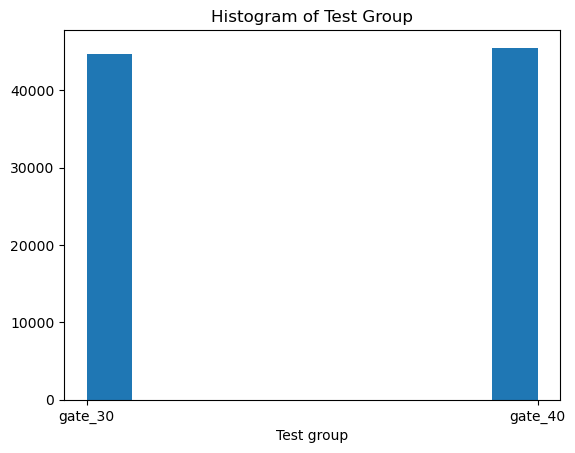

In [11]:
# Create a histogram of the 'version' column

plt.hist(data['version'])

plt.xlabel('Test group')
plt.title('Histogram of Test Group')
plt.show()

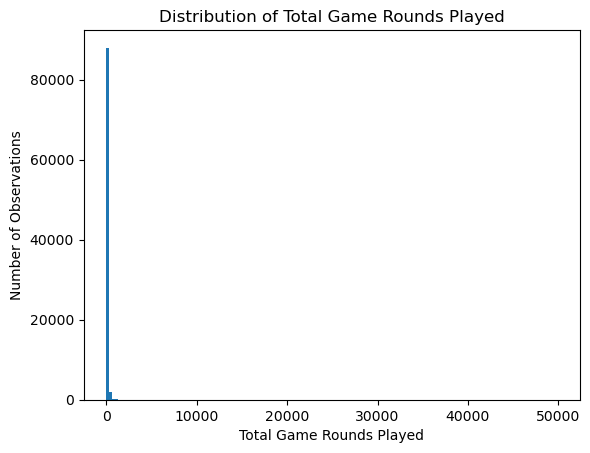

In [12]:
# Plot a histogram of the 'sum_gamerounds' column

plt.hist(data['sum_gamerounds'], bins=150)

plt.title('Distribution of Total Game Rounds Played')
plt.xlabel('Total Game Rounds Played')
plt.ylabel('Number of Observations')
plt.show()

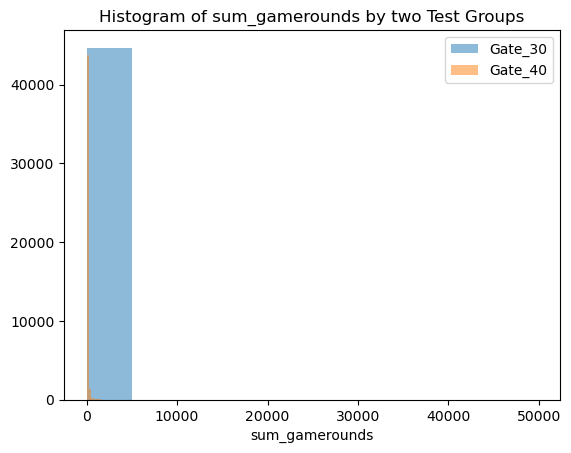

In [13]:
# Convert the 'test group' column to string type
data['version'] = data['version'].astype(str)

# Convert the 'converted' column to integer type
data['sum_gamerounds'] = data['sum_gamerounds'].astype(int)

# Separate the test groups into separate dataframes
test_30 = data[data['version'] == 'gate_30']
test_40 = data[data['version'] == 'gate_40']

# Create a histogram of the 'converted' column for each group
plt.hist(test_30['sum_gamerounds'], alpha=0.5, label='Gate_30')
plt.hist(test_40['sum_gamerounds'], alpha=0.5, label='Gate_40')


plt.xlabel('sum_gamerounds')
plt.title('Histogram of sum_gamerounds by two Test Groups')
plt.legend(loc='upper right')
plt.show()

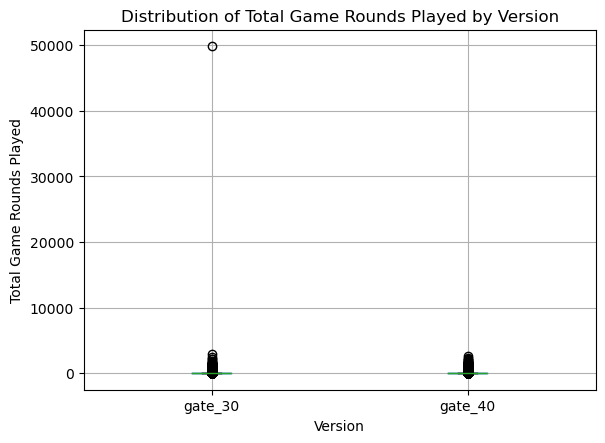

In [14]:
# Create a box plot of 'sum_gamerounds' by 'version'

data.boxplot(column='sum_gamerounds', by='version')

plt.title('Distribution of Total Game Rounds Played by Version')
plt.suptitle('')
plt.xlabel('Version')
plt.ylabel('Total Game Rounds Played')
plt.show()

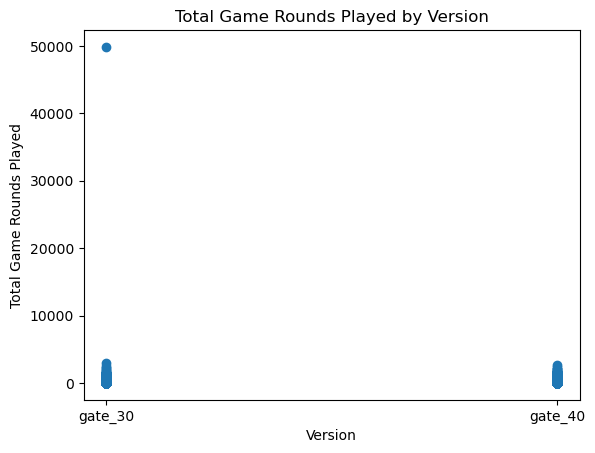

In [15]:
# Create a scatter plot of 'sum_gamerounds' by 'version'

plt.scatter(data['version'], data['sum_gamerounds'])

plt.title('Total Game Rounds Played by Version')
plt.xlabel('Version')
plt.ylabel('Total Game Rounds Played')
plt.show()

### Calculate mean:

In [16]:
mean_sum_gamerounds = data.sum_gamerounds.mean()
mean_test_30 = test_30.sum_gamerounds.mean()
mean_test_40 = test_40.sum_gamerounds.mean()
diff_mean_test = mean_test_30 - mean_test_40

print(f' Mean of converted column: {mean_sum_gamerounds}')
print('+'*50)
print(f' Mean of ad group in converted column: {mean_test_30}')
print('+'*50)
print(f' Mean of psa group in converted column: {mean_test_40}')
print('+'*50)
print(f' Difference of means: {diff_mean_test}')

 Mean of converted column: 51.8724567297564
++++++++++++++++++++++++++++++++++++++++++++++++++
 Mean of ad group in converted column: 52.45626398210291
++++++++++++++++++++++++++++++++++++++++++++++++++
 Mean of psa group in converted column: 51.29877552814966
++++++++++++++++++++++++++++++++++++++++++++++++++
 Difference of means: 1.157488453953249


### Binomial test:

In [17]:
max_rounds=data.sum_gamerounds.max()
normalized_mean = data.sum_gamerounds.mean() / max_rounds

gate30_sumgamerounds = np.random.binomial(len(test_30), 
                                          normalized_mean, 
                                          10000) / len(test_30)
gate40_sumgamerounds = np.random.binomial(len(test_40), 
                                          normalized_mean, 
                                          10000) / len(test_40)

In [18]:
p_diffs = gate40_sumgamerounds - gate30_sumgamerounds
p_diffs_mean = p_diffs.mean()
print(f'Difference of pvalues: {p_diffs}')
print('-'*35)
print(f' Mean: {p_diffs_mean}')

Difference of pvalues: [-3.49927507e-04  2.96996353e-06 -1.72120673e-04 ...  4.02162275e-04
 -1.30482168e-04 -6.41441304e-05]
-----------------------------------
 Mean: 1.5031202321794058e-06


In [19]:
normalized_mean_test = (test_40.sum_gamerounds.mean() - test_30.sum_gamerounds.mean()) / max_rounds
normalized_mean_test

-2.321756436701667e-05

In [20]:
print((p_diffs > normalized_mean_test).mean() * 100)
print('-'*20)
print((p_diffs < normalized_mean_test).mean() *100)

55.85
--------------------
44.15


### Mann-Whitney U test:

The choice of statistical test depends on the research question and the specific characteristics of the data. A Mann-Whitney U test (also known as a Wilcoxon rank-sum test) can be used to compare the 'sum_gamerounds' between two independent groups, such as two different versions of the game.

The Mann-Whitney U test is a non-parametric alternative to the two-sample t-test, which does not assume a normal distribution of the data. It works by comparing the ranks of the observations in the two groups, rather than their actual values. The null hypothesis for the Mann-Whitney U test is that there is no difference in the 'sum_gamerounds' between the two groups, and the alternative hypothesis is that there is a significant difference.

To perform a Mann-Whitney U test in Python, you can use the scipy.stats.mannwhitneyu() function. Here's an example of how to perform a Mann-Whitney U test on the 'sum_gamerounds' between two versions of the game:

In [21]:
# Split the data into two groups based on the 'version' column
group1 = data[data['version'] == 'gate_30']['sum_gamerounds']
group2 = data[data['version'] == 'gate_40']['sum_gamerounds']

# Perform a Mann-Whitney U test on the two groups
stat, p_value = sp.stats.mannwhitneyu(group1, group2)

print('Mann-Whitney U test statistic:', stat)
print('P-value:', p_value)

Mann-Whitney U test statistic: 1024331250.5
P-value: 0.05020880772044255
